### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load Dataset and preprocessing it

In [2]:
movie_data = pd.read_csv('my_movies.csv')
movie_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie_data_1 = movie_data.iloc[:,5:]
movie_data_1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
movie_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [6]:
movie_data_1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. EDA

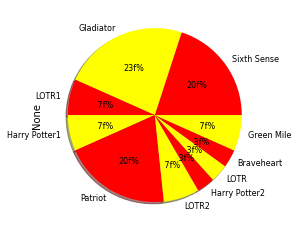

In [10]:
movie_data_1.mean().plot(kind='pie', autopct='%2.0ff%%', fontsize='8', 
                                        colors = ['Red','yellow'], shadow =True)
plt.show()

### 4.Model building

<ipython-input-11-d9cebdfecdbf>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

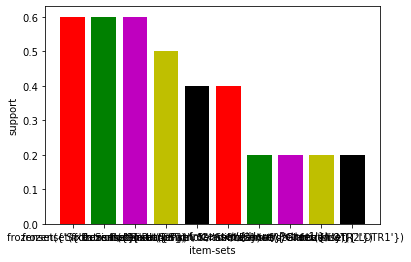

In [11]:
#Apriori Algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movie_data_1,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [12]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [13]:
# eliminate Redudancy in Rules

def to_list(i):
    return (sorted(list(i)))


In [14]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [15]:
ma_X = ma_X.apply(sorted)

In [16]:
rules_sets = list(ma_X)

In [17]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [18]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [19]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
114,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
60,"(Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
118,"(Harry Potter1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
86,"(LOTR1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
92,"(Green Mile, Sixth Sense)",(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
12,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
38,"(LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
66,"(Green Mile, Sixth Sense)",(LOTR2),0.2,0.2,0.1,0.5,2.5,0.06,1.6
